In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data_path = 'healthcare-dataset-stroke-data (2).csv'
df = pd.read_csv(data_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_edit = df.drop(columns=['id'])


In [5]:
# count nulls
df_edit.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df_edit.describe(percentiles=[.25, .5, .75, .95, .99])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
95%,79.000000,1.000000,1.000000,216.294500,42.960000,0.000000
99%,82.000000,1.000000,1.000000,240.708200,53.400000,1.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
# count row examples that have bmi nulls and stroke > 0

# bmi nulls and stroke > 0

df_edit[(df_edit['bmi'].isnull()) & (df_edit['stroke'] > 0)].shape[0]

40

Correlation between BMI and Stroke: 0.04


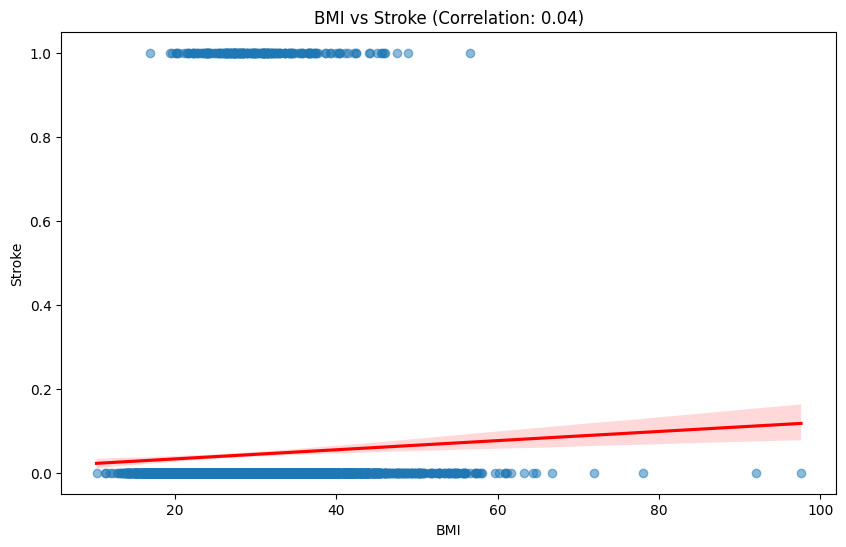

In [9]:
# Let's just remove the rows with nulls in bmi for now
df_edit_droped = df_edit.dropna(subset=['bmi'])
# Calculate the correlation coefficient
correlation = df_edit_droped[['bmi', 'stroke']].corr().iloc[0, 1]
print(f"Correlation between BMI and Stroke: {correlation:.2f}")

# Visualize the correlation using a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='stroke', data=df_edit, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'BMI vs Stroke (Correlation: {correlation:.2f})')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()

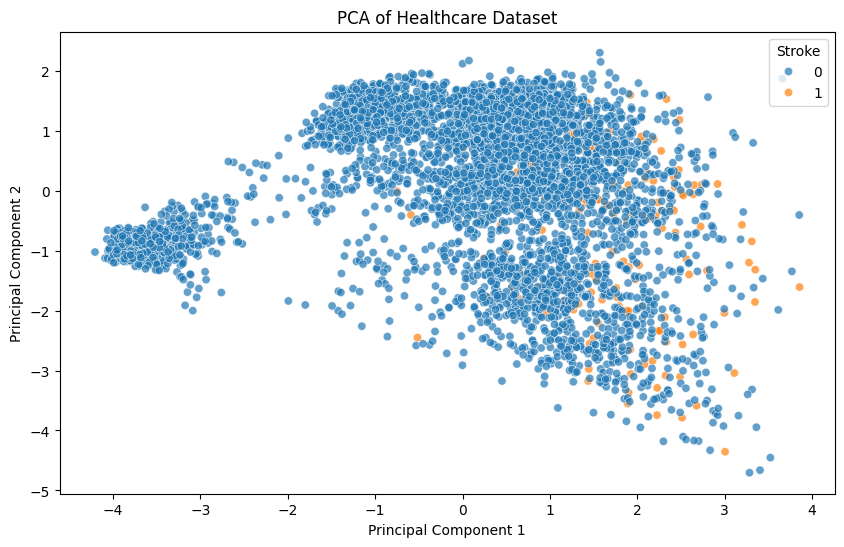

In [10]:
#Let's do some PCA to visualize the data in 2D
# we need to convert categorical variables to numerical ones
#This is done by using one-hot encoding and dropping the first column of each categorical variable
df_edit_droped = pd.get_dummies(df_edit_droped, drop_first=True)
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_edit_droped.drop(columns=['stroke']))
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['stroke'] = df_edit_droped['stroke'].values
# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='stroke', data=pca_df, alpha=0.7)
plt.title('PCA of Healthcare Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stroke', loc='upper right')
plt.show()

Using PCA is not useful here, classes are not sperated well as needed, we can use LDA for better visualization

C:\Users\moham\AppData\Local\Temp\ipykernel_21380\591554336.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Stroke', loc='upper right')


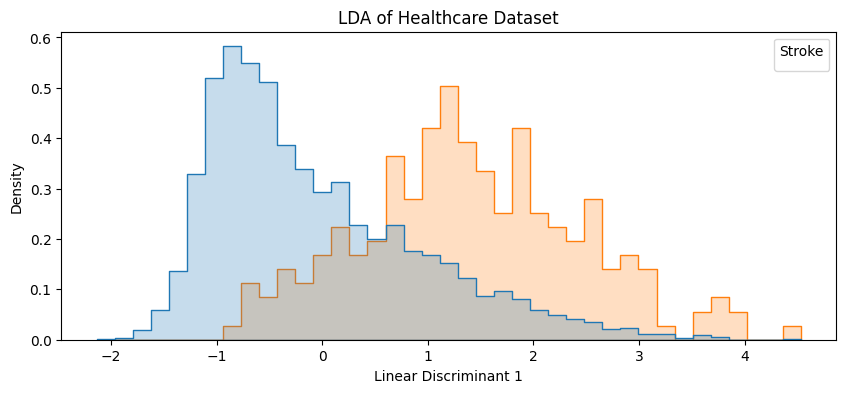

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Separate features and target
X = df_edit_droped.drop(columns=['stroke'])
y = df_edit_droped['stroke']

# Standardize the features
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LDA(n_components=1)  # Only 1 component for binary classification
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame with the LDA result
lda_df = pd.DataFrame(data=X_lda, columns=['LD1'])
lda_df['stroke'] = y.values

# Plot the LDA result
plt.figure(figsize=(10, 4))
sns.histplot(data=lda_df, x='LD1', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('LDA of Healthcare Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Density')
plt.legend(title='Stroke', loc='upper right')
plt.show()


Good insight, LDA showed that there's a hard of separabilty between the two classes

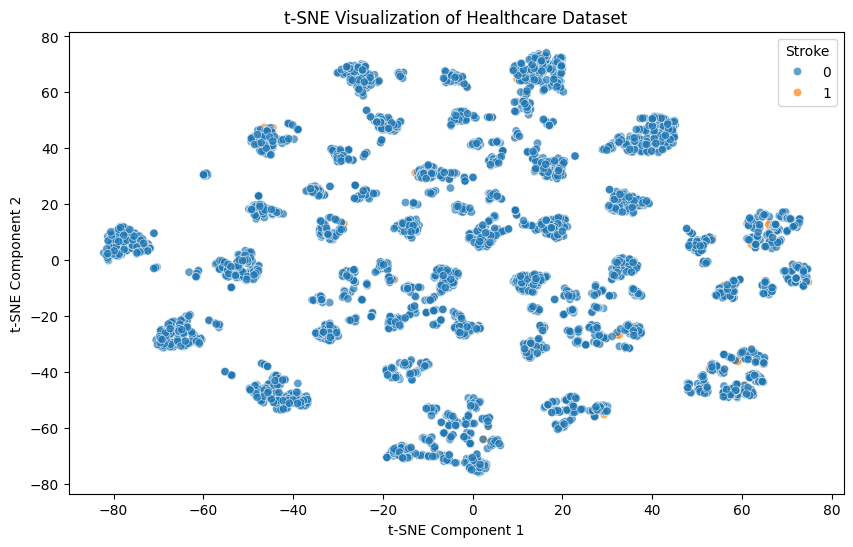

In [12]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Prepare the data
X = df_edit_droped.drop(columns=['stroke'])
y = df_edit_droped['stroke']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 3. Create a DataFrame for plotting
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['stroke'] = y.values

# 4. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='stroke', data=tsne_df, alpha=0.7)
plt.title('t-SNE Visualization of Healthcare Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Stroke')
plt.show()


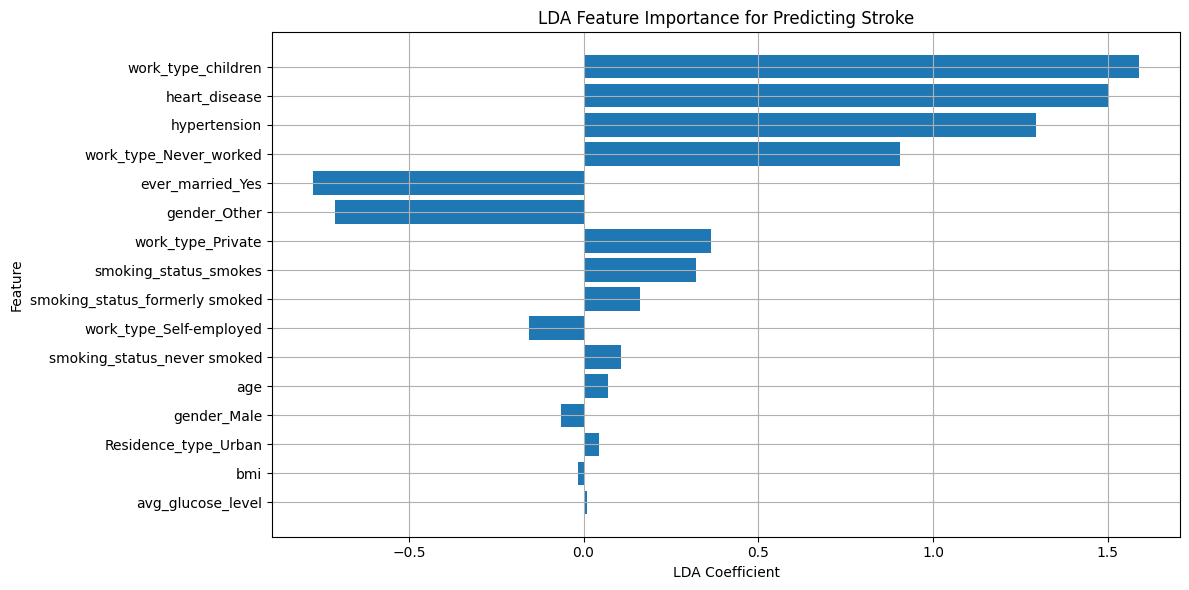

,Feature,LDA Coefficient
11,work_type_children,1.588931
2,heart_disease,1.503818
1,hypertension,1.296139
8,work_type_Never_worked,0.905550
7,ever_married_Yes,-0.773459
6,gender_Other,-0.710310
9,work_type_Private,0.366122
15,smoking_status_smokes,0.322851
13,smoking_status_formerly smoked,0.161226
10,work_type_Self-employed,-0.156682


In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Separate features and target
X = df_edit_droped.drop(columns=['stroke'])
y = df_edit_droped['stroke']

# Fit LDA
lda = LDA(n_components=1)
lda.fit(X, y)

# Get feature importance (coefficients)
coef = lda.coef_[0]

# Create DataFrame for better display
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'LDA Coefficient': coef
})

# Sort by absolute importance
feature_importance['Abs Importance'] = feature_importance['LDA Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['LDA Coefficient'])
plt.title('LDA Feature Importance for Predicting Stroke')
plt.xlabel('LDA Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display DataFrame too if needed
feature_importance.drop(columns='Abs Importance')


Well, since BMI has a very low importance to the class, we can replace its values with the mean value, as Null values of BMI hold 40 data of total 249 Stroke = 1, so dropping them could be more of a loss than replacing them with the mean value.

In [46]:
# now we can replcae nan values in bmi with the mean of the column
df_edit['bmi'].fillna(df_edit['bmi'].mean(), inplace=True)
# check if there are any nulls left
df_edit.isnull().sum()

C:\Users\moham\AppData\Local\Temp\ipykernel_6324\1250785097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_edit['bmi'].fillna(df_edit['bmi'].mean(), inplace=True)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

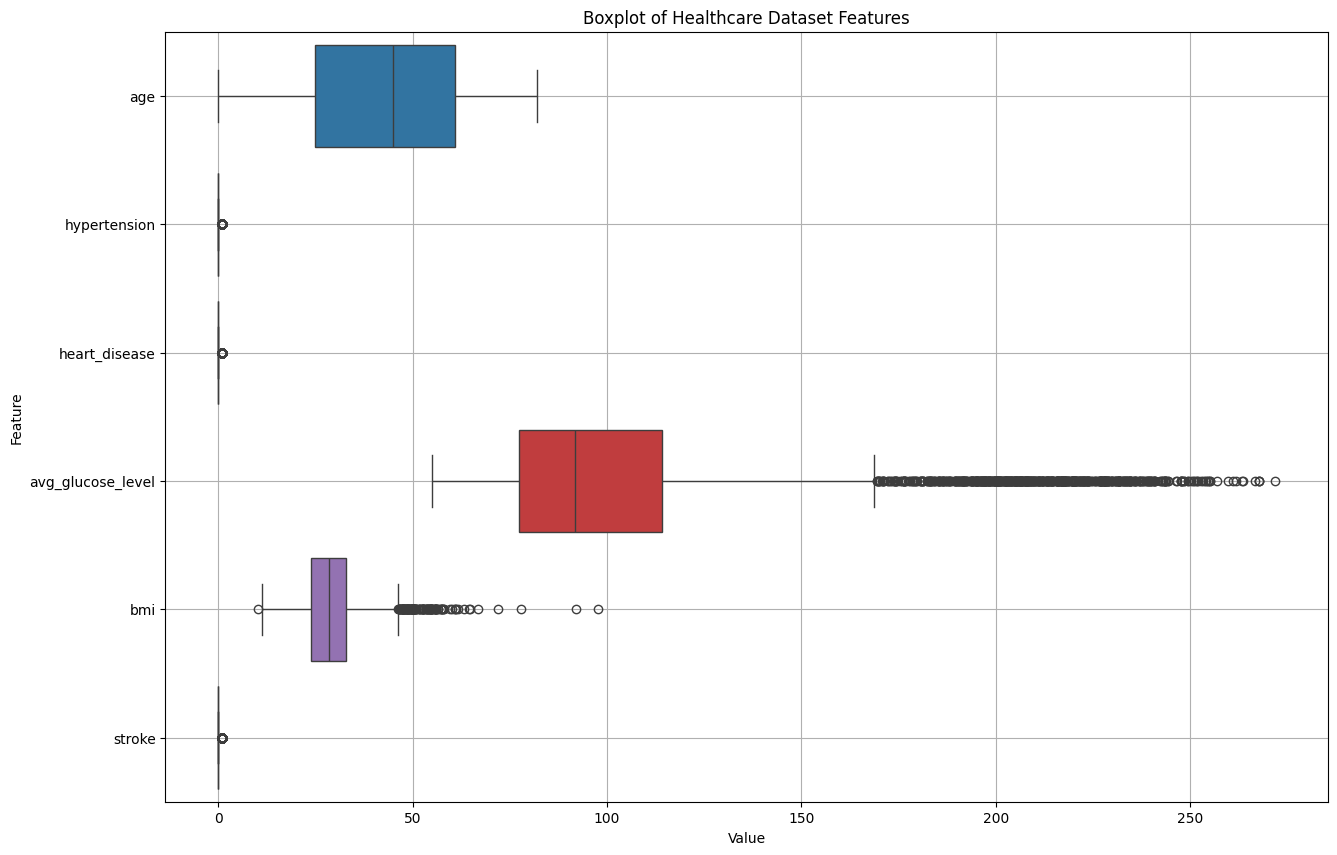

In [50]:
#Plot a boxplot for all the columns in the dataset
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_edit, orient='h')
plt.title('Boxplot of Healthcare Dataset Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [51]:
# Based on box plot, there are outliers in bmi column, let's remove them. Values above 65 are outliers
df_edit = df_edit[df_edit['bmi'] < 65]

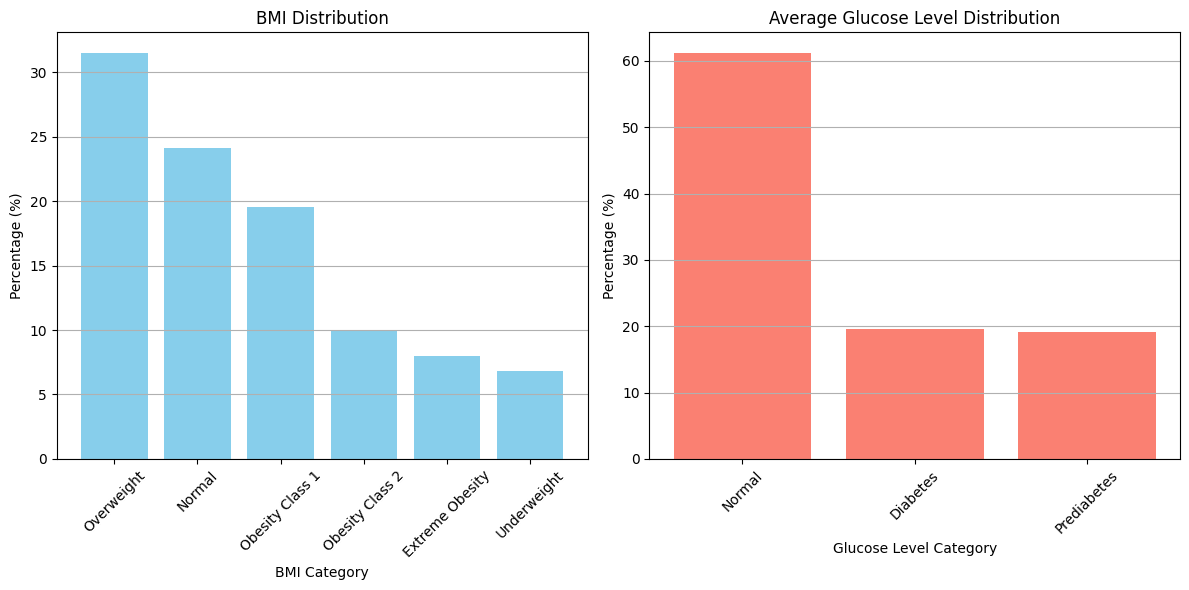

In [53]:
# let's plot avg glucose level and bmi if they are realistic according medical standards


# Assuming df is your DataFrame
# Define BMI categories
bmi_categories = pd.cut(df_edit['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                        labels=['Underweight', 'Normal', 'Overweight', 'Obesity Class 1', 'Obesity Class 2', 'Extreme Obesity'])

# Calculate BMI category percentages
bmi_distribution = bmi_categories.value_counts(normalize=True) * 100

# Define glucose level categories
glucose_categories = pd.cut(df_edit['avg_glucose_level'], bins=[0, 100, 125, float('inf')],
                            labels=['Normal', 'Prediabetes', 'Diabetes'])

# Calculate glucose level category percentages
glucose_distribution = glucose_categories.value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bmi_distribution.index.astype(str), bmi_distribution.values, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.subplot(1, 2, 2)
plt.bar(glucose_distribution.index.astype(str), glucose_distribution.values, color='salmon')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Glucose Level Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [56]:
#describe bmi and avg glucose level columns
df_edit[['bmi', 'avg_glucose_level']].describe(percentiles=[.25, .5, .75, .95, .99])


,bmi,avg_glucose_level
count,5105.000000,5105.000000
mean,28.841947,106.159240
std,7.516207,45.267409
min,10.300000,55.120000
25%,23.800000,77.290000
50%,28.400000,91.890000
75%,32.800000,114.090000
95%,42.500000,216.342000
99%,52.692000,240.709200
max,64.800000,271.740000


In [57]:
# let's remove BMIs above 45 and avg glucose levels above 175, so weird
df_edit = df_edit[(df_edit['bmi'] < 45) & (df_edit['avg_glucose_level'] < 175)]
#wanna check data count
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4391 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4391 non-null   object 
 1   age                4391 non-null   float64
 2   hypertension       4391 non-null   int64  
 3   heart_disease      4391 non-null   int64  
 4   ever_married       4391 non-null   object 
 5   work_type          4391 non-null   object 
 6   Residence_type     4391 non-null   object 
 7   avg_glucose_level  4391 non-null   float64
 8   bmi                4391 non-null   float64
 9   smoking_status     4391 non-null   object 
 10  stroke             4391 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 411.7+ KB


Well, data shrinked to 4391, I think we can do better now?

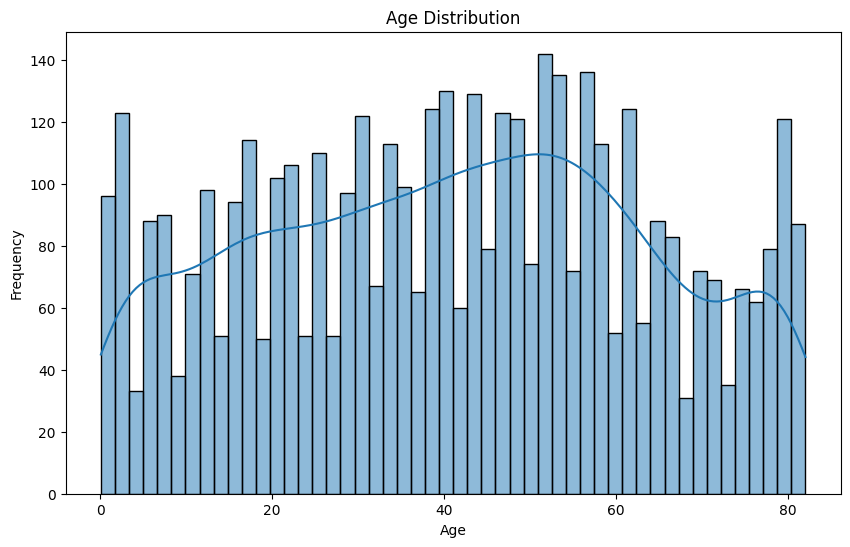

In [58]:
# plot age to check distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_edit['age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='age'>

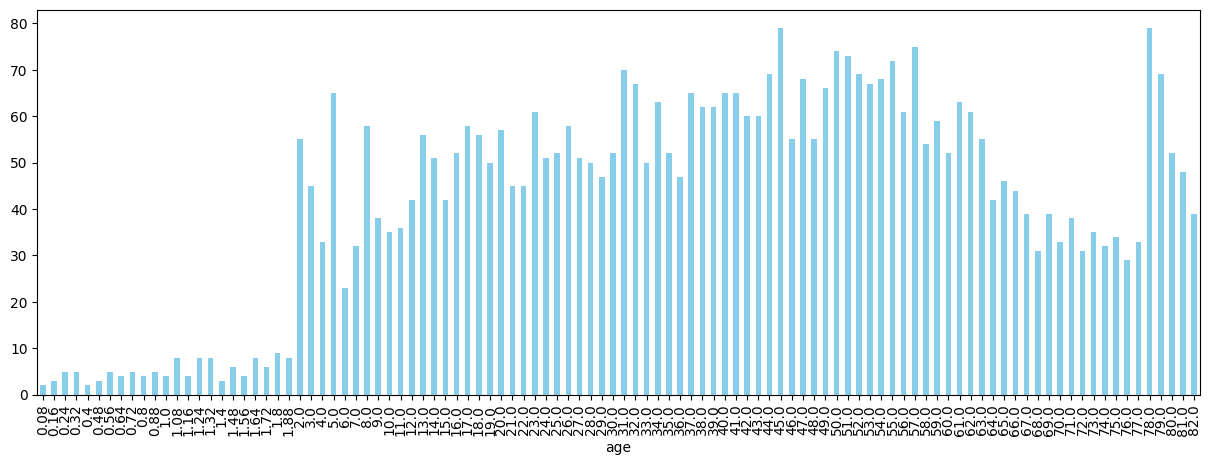

In [59]:
df_edit['age'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5), color='skyblue')

In [67]:
#count total data for age less than 2
rows_less_2 = df_edit[df_edit['age'] < 5].shape[0]
print(f"Total people with age less than 2: {rows_less_2}")

Total people with age less than 2: 252


In [83]:
# #count total data for age less than 2 and have stroke
# age = 45
# rows_less_2_stroke = df_edit[(df_edit['age'] < age) & (df_edit['stroke'] > 0)].shape[0]
# print(f"Total people with age less than {age} and stroke: {rows_less_2_stroke}")


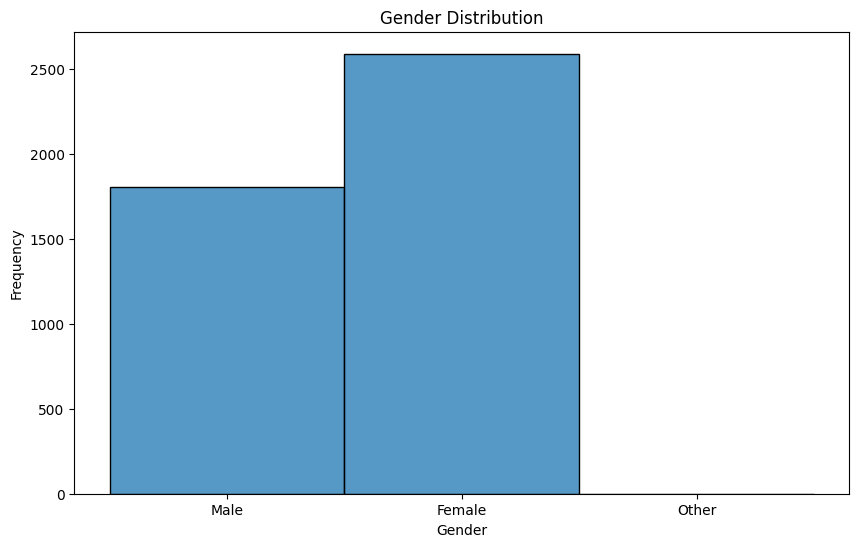

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df_edit['gender'], bins=50)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [62]:
df_edit['gender'].value_counts()

gender
Female    2587
Male      1803
Other        1
Name: count, dtype: int64

Let's remove the "Other" gender, for safety

In [ ]:
# display the gender "Other" data

df_edit[df_edit['gender'] == 'Other'].head(10) 



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Text(0.5, 1.0, 'Stroke Class Distribution')

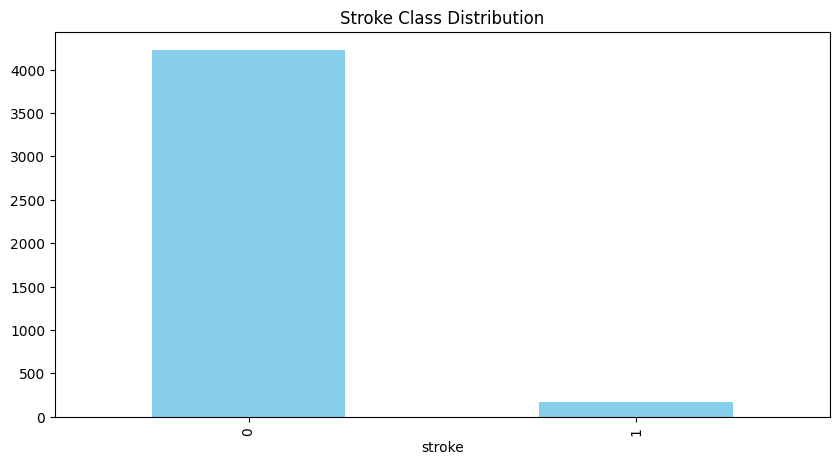

In [63]:
 #display class distribution
df_edit['stroke'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Stroke Class Distribution')

In [76]:
df_edit['stroke'].value_counts()

stroke
0    4225
1     166
Name: count, dtype: int64